In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import json
import sys
from sklearn.metrics import pairwise_distances
import pandas as pd

In [44]:
# Load the matched cell file for the desired recording. 
matched_cells = pd.read_csv("C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID276/ID276_07032023_Psilocybin/Combined/suite2p/plane0/matched_cell_numbers.csv")
print(matched_cells)

     Unnamed: 0  cells_rec_1  cells_rec_2
0             0            1            3
1             1            3           16
2             2            4            8
3             3            5            6
4             4            6            2
..          ...          ...          ...
442         442         1577          648
443         443         1579         1375
444         444         1631         1466
445         445         1632         1610
446         446         2058         1619

[447 rows x 3 columns]


In [54]:
 # load the first dictionary file
cell_1 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-063/suite2p/plane0/cells.pkl"

with open(cell_1,'rb') as f:
    cell_dict_1 = pickle.load(f)

cell_2 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID276/ID276_07032023_Psilocybin/Combined/Rec2/cells.pkl"

with open(cell_2,'rb') as f:
    cell_dict_2 = pickle.load(f)



print(len(cell_dict_1.keys()),len(cell_dict_2.keys()))

708 779


In [68]:
# Filter cell dict so only matched cells are included.
matched_cells_1 = matched_cells['cells_rec_1'].tolist()

matched_cells_2 = matched_cells['cells_rec_2'].tolist()



cell_matched_1 = {key: cell_dict_1[key] for key in matched_cells_1}

cell_matched_2 = {key: cell_dict_2[key] for key in matched_cells_2}


In [69]:
# Get recording info, number of freqencies, intensities and trials for each combination.
nfreq = list(cell_matched_1[3]['traces'].keys())
nInt = list(cell_matched_1[3]['traces'][nfreq[0]].keys())
ntrial = list(cell_matched_1[3]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [73]:
# Extract the trials for every combination into a matrix of shape nfreq x nInt x nTrials x nCells x nFrames

matrix_all = np.array([[[[cell_matched_2[n]['traces'][i][j][k] for n in cell_matched_2.keys()] for k in ntrial] for j in nInt] for i in nfreq])
print(matrix_all.shape)

(12, 4, 10, 433, 15)


In [74]:
# Reshape the matrix so that all of the response combinations are flattened, with one dimension for each cell. nFrames (flat) x nCells
matrix_flatten = (matrix_all).reshape(-1,len(matrix_all[0,0,0,:,0]))
print(matrix_flatten.shape)

(7200, 433)


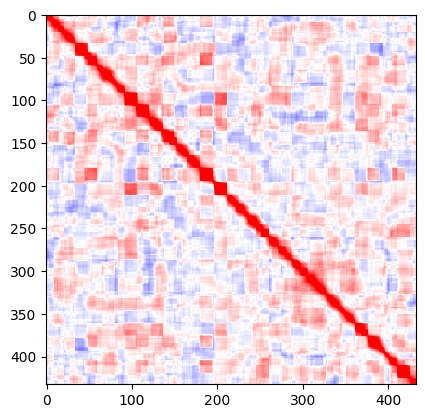

In [75]:
# Compute the pairwise correlations for every cell 
cc = 1-pairwise_distances(matrix_flatten.T, metric='correlation')
plt.imshow(cc, vmin=-.5, vmax=.5, cmap='bwr')